In [1]:
import glob
from os import path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager

from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist, plot_bode, plot_residuals
from impedance import preprocessing
from impedance.models.circuits.elements import G

%reload_ext autoreload
%autoreload 2

In [2]:
fpath=r'G:\My Drive\UW Research\fr-XAS July 2018\Data\Versastat'

file_str1=fpath+r'\1% O2 EIS OCV.csv'
if path.exists(file_str1):
    data1=np.array(pd.read_csv(file_str1,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels=list('1% O2')

file_str2=fpath+r'\10% O2 EIS OCV.csv'
if path.exists(file_str2):
    data2=np.array(pd.read_csv(file_str2,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels.append('10% O2')

file_str3=fpath+r'\100% O2 EIS OCV.csv'
if path.exists(file_str3):
    data3=np.array(pd.read_csv(file_str3,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels.append('100% O2')


Text(299.5688, 203.4323, '8 Hz')

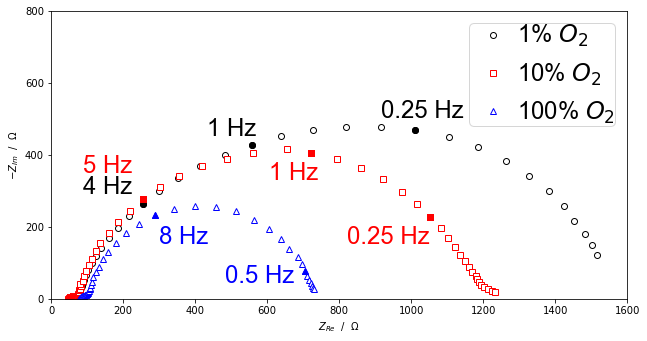

In [3]:
fig=plt.figure(figsize=(10,10))

# 1% O2 highlight points
filled1=np.array([[data1[40,5],data1[45,5],data1[50,5]],
                 [-data1[40,6],-data1[45,6],-data1[50,6]]]).T

filled2=np.array([[data2[43,5],data2[50,5],data2[56,5]],
                 [-data2[43,6],-data2[50,6],-data2[56,6]]]).T

filled3=np.array([[data3[37,5],data3[48,5]],
                 [-data3[37,6],-data3[48,6]]]).T


ax1=fig.add_axes([.1, .1, .8, .4])
ax1.plot(data1[:,5],-data1[:,6],color=(0,0,0),marker='o',mfc=(1,1,1),linestyle='',label='1% $O_2$')
ax1.plot(data2[:,5],-data2[:,6],color=(1,0,0),marker='s',mfc=(1,1,1),linestyle='',label='10% $O_2$')
ax1.plot(data3[:,5],-data3[:,6],color=(0,0,1),marker='^',mfc=(1,1,1),linestyle='',label='100% $O_2$')
ax1.legend(loc=1)
ax1.plot(filled1[:,0],filled1[:,1], color=(0,0,0),marker='o',mfc=(0,0,0),linestyle='',zorder=4)
ax1.plot(filled2[:,0],filled2[:,1],color=(1,0,0),marker='s',mfc=(1,0,0),linestyle='',zorder=5)
ax1.plot(filled3[:,0],filled3[:,1],color=(0,0,1),marker='^',mfc=(0,0,1),linestyle='',zorder=6)

ax1.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set(xlim=[0,1600],ylim=[0, 800])


# title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal'}
title_font = {'family':'Arial', 'size':'24', 'weight':'normal'}
mpl.rc('font',**title_font)
ax1.set_ylabel(r'$-Z_{Im}$  /  $\Omega$')#,**title_font)
ax1.set_xlabel(r'$Z_{Re}$  /  $\Omega$')#,**title_font)
ax1.legend(loc=1,borderpad=0, handletextpad=0)

ax1.annotate('0.25 Hz', xy=(filled1[2,0],filled1[2,1]), xytext=(filled1[2,0]+20,filled1[2,1]+20),
            ha='center', va='bottom')
ax1.annotate('1 Hz', xy=(filled1[1,0],filled1[1,1]), xytext=(filled1[1,0]+10,filled1[1,1]+10),
            ha='right', va='bottom')
ax1.annotate('4 Hz', xy=(filled1[0,0],filled1[0,1]), xytext=(filled1[0,0]-30,filled1[0,1]+15),
            ha='right', va='bottom')

ax1.annotate('0.25 Hz', xy=(filled2[2,0],filled2[2,1]),color='red', xytext=(filled2[2,0],filled2[2,1]-25),
            ha='right', va='top')
ax1.annotate('1 Hz', xy=(filled2[1,0],filled2[1,1]),color='red', xytext=(filled2[1,0]+20,filled2[1,1]-25),
            ha='right', va='top')
ax1.annotate('5 Hz', xy=(filled2[0,0],filled2[0,1]),color='red', xytext=(filled2[0,0]-30,filled2[0,1]+60),
            ha='right', va='bottom')

ax1.annotate('0.5 Hz', xy=(filled3[1,0],filled3[1,1]),color='blue', xytext=(filled3[1,0]-30,filled3[1,1]-15),
            ha='right', va='center')
ax1.annotate('8 Hz', xy=(filled3[0,0],filled3[0,1]),color='blue', xytext=(filled3[0,0]+10,filled3[0,1]-30),
            ha='left', va='top')


# plt.show()
# plt.savefig('EIS for fr-XAS.png',dpi=400,format='png',bbox_inches='tight')

## Read in and plot measured EIS

In [4]:
data_dir = 'C:\\Users\shadd\OneDrive\Documents\Python\EIS\Data'
file_str1 = data_dir + '\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par'
file_str10 = data_dir + '\LSC_DPB1_FRXAS_700C_10%_EIS_OCV_after.par'
file_str100 = data_dir + '\LSC_DPB1_FRXAS_700C_100%_EIS_OCV_before2.par'

f_1, Z_1 = preprocessing.readVersaStudio(file_str1)
f_10, Z_10 = preprocessing.readVersaStudio(file_str10)
f_100, Z_100 = preprocessing.readVersaStudio(file_str100)
print(f_1[19], f_1[-1])
print(f_10[20], f_10[-1])
print(f_100[19], f_100[-1])

# Cuts off high frequency arc and subtracts real part of "intercept"
# f_1, Z_1 = f_1[19:], Z_1[19:] - Z_1[19].real
# f_10, Z_10 = f_10[20:], Z_10[20:] - Z_10[20].real
# f_100, Z_100 = f_100[19:], Z_100[19:] - Z_100[19].real
# f_1, Z_1 = f_1[19:], Z_1 - Z_1.real
# f_10, Z_10 = f_10, Z_10 - Z_10.real
# f_100, Z_100 = f_100, Z_100 - Z_100.real

# fname_w_Zg = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_Zg_3.svg'
# fname_w_par = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_parallel_2.svg'

fs_list = [f_1, f_10, f_100]
Zs_list = [Z_1, Z_10, Z_100]

774.2637 0.02154435
1000.0 0.007943282
774.2637 0.1


In [5]:
def frxas_Rg(ld, tg, Ao, xvo, L=630e-7, W=1.0435, T=973):
    R = 8.314
    F = 96485
    co = 3/33.7
    
    return (R * T) / (4 * F ** 2) * (Ao * tg) / (2 * W * ld * co * L * xvo)

In [6]:
# Rg_1 = 6169 
# Rg_1_KM = 4872
# tg_1 = 3.26
# New FR-XAS profile fitting
# Rg_1 = 4986.3 
ld_1 = 32.80e-4
tg_1 = 2.344
Rg_1 = 2492.9
R_ohm1 = Z_1[0].real
xvo1_MB = 2.001e-2
Ao1_MB = 2.689
xvo1_MC = 1.527e-2
Ao1_MC = 2.692

# Rg_10 = 5113
# Rg_10_KM = 3898
# tg_10 = 1.17
# New FR-XAS profile fitting
# Rg_10 = 4783
ld_10 = 17.15e-4
tg_10 = 0.9462
Rg_10 = 2391.6
R_ohm10 = Z_10[0].real
xvo10_MB = 1.314e-2
Ao10_MB = 2.088
xvo10_MC = 9.28e-3
Ao10_MC = 2.037

# Rg_100 = 4182
# Rg_100_KM = 3092
# tg_100 = 0.1439
# New FR-XAS profile fitting
# Rg_100 = 3659
# tg_100 = 0.1447
# Fixed missing 2 in denominator
# Rg_100 = 1829.1
ld_100 = 4.978e-4
tg_100 = 0.144
Rg_100 = 1829.7
R_ohm100 = Z_100[0].real
xvo100_MB = 7.533e-3
Ao100_MB = 1.673
xvo100_MC = 4.8e-3
Ao100_MC = 1.527


Rgs = [Rg_1, Rg_10, Rg_100]
Rohms = [R_ohm1, R_ohm10, R_ohm100]
tgs = [tg_1, tg_10, tg_100]
lds = [ld_1, ld_10, ld_100]
xvs_MB = [xvo1_MB, xvo10_MB, xvo100_MB]
Aos_MB = [Ao1_MB, Ao10_MB, Ao100_MB]
xvs_MC = [xvo1_MC, xvo10_MC, xvo100_MC]
Aos_MC = [Ao1_MC, Ao10_MC, Ao100_MC]

# Zgs = []
# for (Rg, Rohm, tg, f) in zip(Rgs, Rohms, tgs, fs_list):
#     Zg = G([Rg, tg], f) + Rohm
#     Zgs.append(Zg)
    
Zgs_MC, Zgs_MB = [], []
Rgs_MC, Rgs_MB = [], []
for (ld, tg, Rohm, xv_MB, Ao_MB, xv_MC, Ao_MC, f) in zip(lds, tgs, Rohms, xvs_MB, Aos_MB, xvs_MC, Aos_MC, fs_list):
    Rg_MB = frxas_Rg(ld, tg, Ao_MB, xv_MB)
    Rgs_MB.append(Rg_MB)
    Rg_MC = frxas_Rg(ld, tg, Ao_MC, xv_MC)
    Rgs_MC.append(Rg_MC)
    
    Zg_MB = G([Rg_MB, tg], f) + Rohm
    Zg_MC = G([Rg_MC, tg], f) + Rohm
    Zgs_MB.append(Zg_MB)
    Zgs_MC.append(Zg_MC)

In [10]:
title_font = {'family':'Arial', 'size':'12', 'weight':'normal'}
mpl.rc('font', **title_font)

0.010 bar 0.129155
0.10 bar 0.3162278
1.0 bar 2.154435


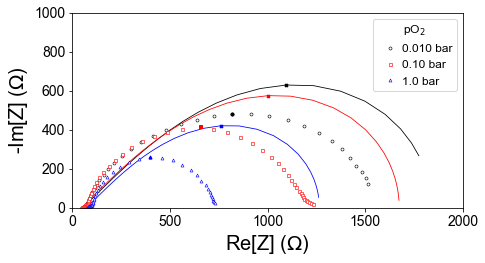

In [15]:
line_freqs = [1, .1]
# labels = ['$1\% \; O_2$', '$10\% \; O_2$', '$100\% \; O_2$']
labels = ['0.010 bar', '0.10 bar', '1.0 bar']

# line_dict = {}
# for line_freq in line_freqs:
#     line_pts = equal_freq_line(line_freq, fs_list*2, Zgs + Zs_list)
# #     line_pts.sort(key=lambda x: x.real)
#     line_dict[str(line_freq)] = line_pts

# _, ax = plt.subplots(figsize=(3.604,4))
_, ax =plt.subplots(figsize=(7,5))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']
Zgs = Zgs_MB
for i, Zs in enumerate(Zs_list):
#     plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(ax, Zgs[i], c=colors[i], fmt='-', lw=0.8)
    plot_nyquist(ax, Zgs[i][np.argmin(Zgs[i].imag)], c=colors[i], fmt='X', ms=3)
    print(f'{labels[i]} {fs_list[i][np.argmin(Zgs[i].imag)]}')
#     for line_freq in line_freqs:
#         plot_nyquist(ax, line_dict[str(line_freq)][i], c=colors[i], ms=8, fmt='x', units ='\Omega')
#         plot_nyquist(ax, line_dict[str(line_freq)][i+3], c=colors[i], fmt=markers[i], units ='\Omega')

for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1), ms=3, mew=.6)
    plot_nyquist(ax, Zs[np.argmin(Zs.imag)], c=colors[i], fmt=markers[i], ms=3)
#     plot_nyquist(ax, Zgs[i], c=colors[i], fmt='-')
#     for line_freq in line_freqs:
#         plot_nyquist(ax, line_dict[str(line_freq)][i], c=colors[i], ms=8, fmt='x', units ='\Omega')
#         plot_nyquist(ax, line_dict[str(line_freq)][i+3], c=colors[i], fmt=markers[i], units ='\Omega') 

ax.tick_params(axis='both', which='major')
ax.set_xlabel('Re[Z] ($\Omega$)')
ax.set_ylabel('-Im[Z] ($\Omega$)')
# ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax.grid(b=False)

# ax.set_ylabel('-Im[Z] ($\Omega$)')
# ax.set_xlabel('Re[Z] ($\Omega$)')
ax.set_ylim(0, 1000)
ax.set_xlim(0, 2000)
ax.legend(title='pO$_2$', prop=title_font, handletextpad=0, loc='upper right')
plt.savefig("G:\\My Drive\\UW Research\\Thesis\\Presentation\\Inkscape\\EISvs_1DZg.svg", bbox_inches='tight', dpi=600)
plt.show()

In [19]:
f_100

array([1.000000e+05, 7.742637e+04, 5.994843e+04, 4.641589e+04,
       3.593814e+04, 2.782559e+04, 2.154435e+04, 1.668101e+04,
       1.291550e+04, 1.000000e+04, 7.742637e+03, 5.994842e+03,
       4.641589e+03, 3.593814e+03, 2.782559e+03, 2.154435e+03,
       1.668101e+03, 1.291550e+03, 1.000000e+03, 7.742637e+02,
       5.994843e+02, 4.641589e+02, 3.593814e+02, 2.782560e+02,
       2.154435e+02, 1.668101e+02, 1.291550e+02, 1.000000e+02,
       7.742637e+01, 5.994843e+01, 4.641589e+01, 3.593814e+01,
       2.782559e+01, 2.154435e+01, 1.668101e+01, 1.291550e+01,
       1.000000e+01, 7.742637e+00, 5.994843e+00, 4.641589e+00,
       3.593814e+00, 2.782559e+00, 2.154435e+00, 1.668101e+00,
       1.291550e+00, 1.000000e+00, 7.742637e-01, 5.994843e-01,
       4.641589e-01, 3.593814e-01, 2.782559e-01, 2.154435e-01,
       1.668101e-01, 1.291550e-01, 1.000000e-01])

0.010 bar 0.129155
0.010 bar 0.4641589
0.10 bar 0.3162278
0.10 bar 1.258925
1.0 bar 2.154435
1.0 bar 4.641589


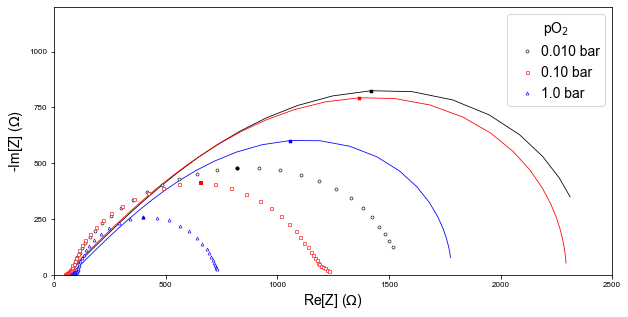

In [21]:
labels = ['0.010 bar', '0.10 bar', '1.0 bar']

_, ax =plt.subplots(figsize=(10,7))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']
Zgs = Zgs_MC

for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zgs[i], c=colors[i], fmt='-', lw=0.8)
    plot_nyquist(ax, Zgs[i][np.argmin(Zgs[i].imag)], c=colors[i], fmt='X', ms=3)
    print(f'{labels[i]} {fs_list[i][np.argmin(Zgs[i].imag)]}')
    print(f'{labels[i]} {fs_list[i][np.argmin(Zs.imag)]}')


for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1), ms=3, mew=.6)
    plot_nyquist(ax, Zs[np.argmin(Zs.imag)], c=colors[i], fmt=markers[i], ms=3)


ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel('Re[Z] ($\Omega$)', **title_font)
ax.set_ylabel('-Im[Z] ($\Omega$)', **title_font)
# ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax.grid(b=False)

# ax.set_ylabel('-Im[Z] ($\Omega$)')
# ax.set_xlabel('Re[Z] ($\Omega$)')
ax.set_ylim(0, 1200)
ax.set_xlim(0, 2500)
ax.legend(title='pO$_2$', prop=title_font, handletextpad=0)
plt.savefig("Correct_1DZg_MC.png", bbox_inches='tight', dpi=400)
plt.show()

0.010 bar 0.129155
0.010 bar 0.4641589
0.10 bar 0.3162278
0.10 bar 1.258925
1.0 bar 2.154435
1.0 bar 4.641589


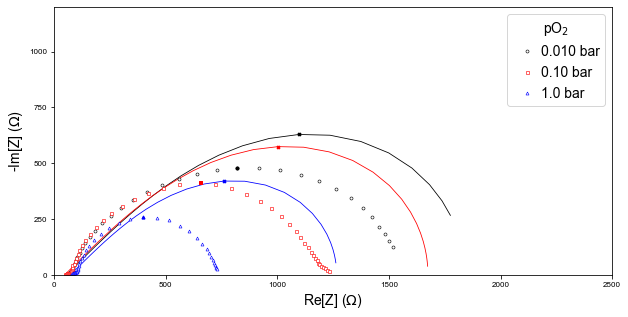

In [22]:
labels = ['0.010 bar', '0.10 bar', '1.0 bar']

_, ax =plt.subplots(figsize=(10,7))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']
Zgs = Zgs_MB

for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zgs[i], c=colors[i], fmt='-', lw=0.8)
    plot_nyquist(ax, Zgs[i][np.argmin(Zgs[i].imag)], c=colors[i], fmt='X', ms=3)
    print(f'{labels[i]} {fs_list[i][np.argmin(Zgs[i].imag)]}')
    print(f'{labels[i]} {fs_list[i][np.argmin(Zs.imag)]}')


for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1), ms=3, mew=.6)
    plot_nyquist(ax, Zs[np.argmin(Zs.imag)], c=colors[i], fmt=markers[i], ms=3)


ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel('Re[Z] ($\Omega$)', **title_font)
ax.set_ylabel('-Im[Z] ($\Omega$)', **title_font)
# ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax.grid(b=False)

# ax.set_ylabel('-Im[Z] ($\Omega$)')
# ax.set_xlabel('Re[Z] ($\Omega$)')
ax.set_ylim(0, 1200)
ax.set_xlim(0, 2500)
ax.legend(title='pO$_2$', prop=title_font, handletextpad=0)
plt.savefig("Correct_1DZg_MB.png", bbox_inches='tight', dpi=400)
plt.show()

## Predict Impedance from Zg with all parallel pathways

In [23]:
# Some geometry calculations
A_NH = np.pi * (0.65**2)
L_NH = 450e-7
A_gate = 1.04345 * 4.28e-4
A_patt = .35**2 - A_gate #0.110 - A_gate  #0.117
L_LSC = 630e-7
L_patt = 280e-7

# Correction factor for patterned geometry to NH geometry
geom_corr = A_NH/A_patt*L_patt/L_NH

In [24]:
# F = 96485
# R = 8.314
# T = 973
# Vm = 35.914
# co = 3 / Vm

def C_chem_gen(Ao, xvo, F=96485, R=8.314, T=973, co=3/35.914):
    return 4 * F**2 * co * xvo / (Ao * R * T)

def C_chem_mizu(delta, F=96485, R=8.314, T=973, Vm = 35.914):
    d = delta
    a = 299000
    
    return 4 * F**2 / (Vm * (a + 3 * R * T / (d * (3 - d))))

# Ignore this one for now
def C_chem_mix(delta, F=96485, R=8.314, T=973, Vm = 35.914):
    d = delta
    cfit = 228000
    
    return 4 * F**2 / (Vm * (cfit + R * T / d))

def ASR(Ao, xvo, tg, L=630e-7, F=96485, R=8.314, T=973, co=3/35.914):
    return R * T / (4 * F**2) * Ao * tg / (co * xvo * L) 

def ASR_KM(Ao, xvo, kchem, F=96485, R=8.314, T=973, co=3/35.914):
    return R * T / (4 * F**2) * Ao / (co * xvo * kchem) 

In [25]:
ASR(2.689, 1.527e-2, 2.344)

17.039412370599386

In [26]:
MB_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Nonstoich.csv', delimiter=',')
MB_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Thermo.csv', delimiter=',')
MC_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Nonstoich.csv', delimiter=',')
MC_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Thermo.csv', delimiter=',')

In [27]:
# Constructing lists of Po2, Ao, delta for mixed bulk models using data arrays and 
# interpolating for Ao if Po2's don't match exactly

MB_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Nonstoich.csv', delimiter=',')
MB_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Thermo.csv', delimiter=',')
MC_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Nonstoich.csv', delimiter=',')
MC_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Thermo.csv', delimiter=',')

MB_delta = MB_delta[np.argsort(MB_delta[:,0])]
MB_Ao = MB_Ao[np.argsort(MB_Ao[:,0])]
MC_delta = MC_delta[np.argsort(MC_delta[:,0])]
MC_Ao = MC_Ao[np.argsort(MC_Ao[:,0])]

MB_vals, MC_vals = [], []

for delta in MB_delta:
    try:
        ao = MB_Ao[np.argwhere(np.isclose(MB_Ao[:,0], delta[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([delta[0], ao, delta[1]])
    except IndexError:
        ao = np.interp(delta[0], MB_Ao[:,0], MB_Ao[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([delta[0], ao, delta[1]])

MB_vals = np.array(MB_vals)

for delta in MC_delta:
    try:
        ao = MC_Ao[np.argwhere(np.isclose(MC_Ao[:,0], delta[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([delta[0], ao, delta[1]])
    except IndexError:
        ao = np.interp(delta[0], MC_Ao[:,0], MC_Ao[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([delta[0], ao, delta[1]])

MC_vals = np.array(MC_vals)

### Use Mixed Bulk Thermo with C_chem_gen and ASR functions to predict extensive values at each Po2

In [28]:
epi = 11
rho_1 = 6.90e6  #8.16e6
rho_10 = 5.31e6 #6.27e6
rho_100 = 4.28e6 #3.05e6

A_patt = 0.110 - A_gate # .35**2 - A_gate

In [41]:
vals1 = MB_vals[np.isclose(MB_vals[:,0], -2)][0]
vals1_MC = MC_vals[np.isclose(MC_vals[:,0], -2)][0]
Ao1 = vals1[1] #2.689 #
xvo1 = vals1[2]/3 #0.1989 #
print(f'Mixed Bulk Ao:{Ao1} xvo: {xvo1}')
print(f'Mizusaki + C Ao:{vals1_MC[1]} xvo: {vals1_MC[2]/3}')
      
C_mask1 = epi*8.854e-12/100 * A_patt / L_patt
R_mask1 = rho_1 * L_patt / A_patt
t_mask1 = R_mask1 * C_mask1
print('Mask: ', C_mask1, R_mask1, t_mask1)
C_film1 = C_chem_gen(Ao1, xvo1) * A_patt * L_LSC
R_film1 = ASR(Ao1, xvo1, tg_1) / A_patt
t_film1 = R_film1 * C_film1
print('Film: ', C_film1, R_film1, t_film1)
C_gate1 = C_chem_gen(Ao1, xvo1) * A_gate * L_LSC
R_gate1 = ASR(Ao1, xvo1, tg_1) / A_gate
t_gate1 = R_gate1 * C_gate1
print('Gate: ', C_gate1, R_gate1, t_gate1)

Mixed Bulk Ao:2.689352176212296 xvo: 0.02008144378178679
Mizusaki + C Ao:2.6915516780817264 xvo: 0.015265127616241747
Mask:  3.810658632407e-09 1763.5234872128126 6.720186e-06
Film:  0.019816542777998675 118.2850119851595 2.3439999999999994
Gate:  8.078252572488099e-05 29016.176196110795 2.344


In [42]:
vals10 = MB_vals[np.isclose(MB_vals[:,0], -1)][0]
vals10_MC = MC_vals[np.isclose(MC_vals[:,0], -1)][0]
Ao10 = vals10[1] #2.689 #
xvo10 = vals10[2]/3 #0.1989 #
print(f'Mixed Bulk Ao:{Ao10} xvo: {xvo10}')
print(f'Mizusaki + C Ao:{vals10_MC[1]} xvo: {vals10_MC[2]/3}')

C_mask10 = epi*8.854e-12/100 * A_patt / L_patt
R_mask10 = rho_10 * L_patt / A_patt
t_mask10 = R_mask10 * C_mask10
print('Mask: ', C_mask10, R_mask10, t_mask10)
C_film10 = C_chem_gen(Ao10, xvo10) * A_patt * L_LSC
R_film10 = ASR(Ao10, xvo10, tg_10) / A_patt
t_film10 = R_film10 * C_film10
print('Film: ', C_film10, R_film10, t_film10)
C_gate10 = C_chem_gen(Ao10, xvo10) * A_gate * L_LSC
R_gate10 = ASR(Ao10, xvo10, tg_10) / A_gate
t_gate10 = R_gate10 * C_gate10
print('Gate: ', C_gate10, R_gate10, t_gate10)

Mixed Bulk Ao:2.088116233657357 xvo: 0.013103655781516352
Mizusaki + C Ao:2.0374103611798757 xvo: 0.009298118532049362
Mask:  3.810658632407e-09 1357.1463358115993 5.1716213999999994e-06
Film:  0.016653995365704808 56.81519534636643 0.9461999999999999
Gate:  6.789033910323523e-05 13937.18182142516 0.9461999999999997


In [43]:
vals100 = MB_vals[np.isclose(MB_vals[:,0], 0)][0]
vals100_MC = MC_vals[np.isclose(MC_vals[:,0], 0)][0]
Ao100 = vals100[1] #2.689 #
xvo100 = vals100[2]/3 #0.1989 #
print(f'Mixed Bulk Ao:{Ao100} xvo: {xvo100}')
print(f'Mizusaki + C Ao:{vals100_MC[1]} xvo: {vals100_MC[2]/3}')

C_mask100 = epi*8.854e-12/100 * A_patt / L_patt
R_mask100 = rho_100 * L_patt / A_patt
t_mask100 = R_mask100 * C_mask100
print(f'Mask: Capacitance ', C_mask100, R_mask100, t_mask100)
C_film100 = C_chem_gen(Ao100, xvo100) * A_patt * L_LSC
R_film100 = ASR(Ao100, xvo100, tg_100) / A_patt
t_film100 = R_film100 * C_film100
print('Film: ', C_film100, R_film100, t_film100)
C_gate100 = C_chem_gen(Ao100, xvo100) * A_gate * L_LSC
R_gate100 = ASR(Ao100, xvo100, tg_100) / A_gate
t_gate100 = R_gate100 * C_gate100
print('Gate: ', C_gate100, R_gate100, t_gate100)

Mixed Bulk Ao:1.6731977959523796 xvo: 0.00753284315341977
Mizusaki + C Ao:1.5273639558329766 xvo: 0.004799553814719036
Mask: Capacitance  3.810658632407e-09 1093.8957283001214 4.1684631999999995e-06
Film:  0.011947919119463597 12.052307900663532 0.144
Gate:  4.870592688339463e-05 2956.519036066103 0.144


In [44]:
Rg_1 = Rgs_MC[0]
Rg_10 = Rgs_MC[1]
Rg_100 = Rgs_MC[2]

R_ohm1 = Z_1.real[0]

vals = [R_ohm1, R_mask1, C_mask1, R_film1, C_film1, R_gate1, C_gate1, Rg_1, tg_1]
circ_Zg_G_MF_1 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_1 = circ_Zg_G_MF_1.predict(np.logspace(-4,8,num=121))

R_ohm10 = Z_10.real[0]

vals = [R_ohm10, R_mask10, C_mask10, R_film10, C_film10, R_gate10, C_gate10, Rg_10, tg_10]
circ_Zg_G_MF_10 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_10 = circ_Zg_G_MF_10.predict(f_10)

R_ohm100 = Z_100.real[0]

vals = [R_ohm100, R_mask100, C_mask100, R_film100, C_film100, R_gate100, C_gate100, Rg_100, tg_100]
circ_Zg_G_MF_100 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_100 = circ_Zg_G_MF_100.predict(f_100)

Z_circ_Zg_G_MFs = [Z_circ_Zg_G_MF_1, Z_circ_Zg_G_MF_10, Z_circ_Zg_G_MF_100]

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


In [46]:
Rgs_MB

[1782.4460411356404, 1627.2072209347916, 1192.4069199555197]

0.010 bar 0.4641589
0.10 bar 1.258925
1.0 bar 4.641589


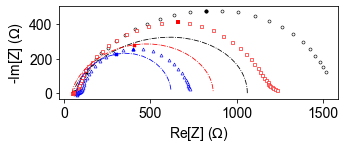

In [45]:
_, ax = plt.subplots(figsize=(5,5))
# _, ax = plt.subplots(figsize=(3.604,4))
colors = [(0, 0, 0), (1,0,0), (0,0,1)]
markers = ['o', 's', '^']


for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1), ms=3, mew=0.6)
    plot_nyquist(ax, Zs[np.argmin(Zs.imag)], c=colors[i], fmt=markers[i], ms=3)
    plot_nyquist(ax, Z_circ_Zg_G_MFs[i], c=colors[i], fmt='-.', lw=0.8)
    plot_nyquist(ax, Z_circ_Zg_G_MFs[i][np.argmin(Zs.imag)], c=colors[i], fmt='X', ms=3)
    print(f'{labels[i]} {fs_list[i][np.argmin(Zs.imag)]}')


# ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel('Re[Z] ($\Omega$)', **title_font)
ax.set_ylabel('-Im[Z] ($\Omega$)', **title_font)
ax.grid(b=False)
    
# ax.set_ylim(-10, 35)
# ax.set_xlim(30, 100)
# ax.legend( labelspacing=0, prop=title_font, loc='upper left', borderpad=.1)

plt.savefig("Correct1D_EIS_MB.png", bbox_inches='tight', dpi=400)
plt.show()

In [54]:
R_ohm_fudge = 1e-5
R_ohm1 = Z_1.real[0] + R_ohm_fudge

circ = 'R0-p(p(R1,C1),G1)'
vals = [R_ohm1, R_gate1, C_gate1, Rg_1, tg_1]
circ_Zg_G_MF_1 = CustomCircuit(circuit=circ, initial_guess=vals)
Z_circ_Zg_G_MF_1 = circ_Zg_G_MF_1.predict(np.logspace(-4,8,num=121))

R_ohm10 = Z_10.real[0] + R_ohm_fudge

vals = [R_ohm10, R_gate10, C_gate10, Rg_10, tg_10]
circ_Zg_G_MF_10 = CustomCircuit(circuit=circ, initial_guess=vals)
Z_circ_Zg_G_MF_10 = circ_Zg_G_MF_10.predict(f_10)

R_ohm100 = Z_100.real[0] + R_ohm_fudge

vals = [R_ohm100, R_gate100, C_gate100, Rg_100, tg_100]
circ_Zg_G_MF_100 = CustomCircuit(circuit=circ, initial_guess=vals)
Z_circ_Zg_G_MF_100 = circ_Zg_G_MF_100.predict(f_100)

Z_circ_Zg_G_MFs = [Z_circ_Zg_G_MF_1, Z_circ_Zg_G_MF_10, Z_circ_Zg_G_MF_100]

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


0.010 bar 0.4641589
0.10 bar 1.258925
1.0 bar 4.641589


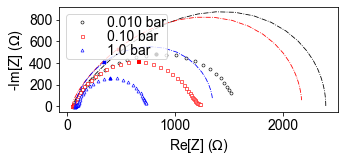

In [55]:
_, ax = plt.subplots(figsize=(5,5))
# _, ax = plt.subplots(figsize=(3.604,4))
colors = [(0, 0, 0), (1,0,0), (0,0,1)]
markers = ['o', 's', '^']


for i, Zs in enumerate(Zs_list):
    plot_nyquist(ax, Zs, c=colors[i], label=labels[i], fmt=markers[i], mfc=(1,1,1), ms=3, mew=0.6)
    plot_nyquist(ax, Zs[np.argmin(Zs.imag)], c=colors[i], fmt=markers[i], ms=3)
    plot_nyquist(ax, Z_circ_Zg_G_MFs[i], c=colors[i], fmt='-.', lw=0.8)
    plot_nyquist(ax, Z_circ_Zg_G_MFs[i][np.argmin(Zs.imag)], c=colors[i], fmt='X', ms=3)
    print(f'{labels[i]} {fs_list[i][np.argmin(Zs.imag)]}')


# ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel('Re[Z] ($\Omega$)', **title_font)
ax.set_ylabel('-Im[Z] ($\Omega$)', **title_font)
ax.grid(b=False)
    
# ax.set_ylim(-10, 70)
# ax.set_xlim(30, 100)
ax.legend( labelspacing=0, prop=title_font, loc='upper left', borderpad=.1)

# plt.savefig("Correct1D_EIS.png", bbox_inches='tight', dpi=400)
plt.show()